1. What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.
      -> **K-Means Clustering**

*   **Concept:** K-Means is a partitioning clustering algorithm. It aims to partition `n` observations into `k` clusters in which each observation belongs to the cluster with the nearest mean (centroid).
*   **Method:** It starts by randomly initializing `k` centroids. It then iteratively assigns each data point to the nearest centroid and recalculates the centroids based on the assigned points until the centroids no longer change significantly.
*   **Number of Clusters:** You need to specify the number of clusters (`k`) beforehand.
*   **Output:** A set of `k` clusters, with each data point assigned to exactly one cluster.
*   **Pros:** Computationally efficient, especially for large datasets.
*   **Cons:** Requires specifying `k` in advance, sensitive to initial centroid placement, and assumes clusters are spherical and equally sized.
*   **Use Case:** Customer segmentation in marketing. You can group customers into `k` different segments based on their purchasing behavior or demographics to tailor marketing strategies.

**Hierarchical Clustering**

*   **Concept:** Hierarchical clustering builds a hierarchy of clusters. It can be either agglomerative (bottom-up, where each data point starts as a cluster and clusters are merged) or divisive (top-down, where all data points start as one cluster and are split).
*   **Method:** Agglomerative clustering starts with each data point as a single cluster and iteratively merges the closest clusters based on a distance metric until all points are in a single cluster or a stopping criterion is met. Divisive clustering starts with one cluster and recursively splits it.
*   **Number of Clusters:** You don't need to specify the number of clusters beforehand. The output is a dendrogram, which allows you to choose the number of clusters by cutting the dendrogram at a certain height.
*   **Output:** A dendrogram (a tree-like diagram) that shows the sequence of merges or splits.
*   **Pros:** Doesn't require specifying `k` in advance, provides a visual representation of the clustering structure (dendrogram), and can capture complex cluster shapes.
*   **Cons:** Can be computationally expensive for large datasets, and interpreting the dendrogram can be subjective.
*   **Use Case:** Phylogenetic analysis in biology. Researchers can use hierarchical clustering to group species based on genetic similarities, visualizing the evolutionary relationships in a dendrogram.

2.  Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
        -> The Silhouette Score is a metric used to evaluate the quality of clusters created by a clustering algorithm.

Here's a breakdown of its purpose:

Measures how well each data point fits into its assigned cluster: For each data point, the Silhouette Score considers two factors:
Cohesion: How close the data point is to other data points within the same cluster.
Separation: How far the data point is from data points in the nearest neighboring cluster.
Provides a single score for each data point: The Silhouette Score for a data point is calculated based on the difference between its separation and cohesion, normalized by the larger of the two values. This score ranges from -1 to +1.
Indicates the quality of the clustering:
A score close to +1 suggests that the data point is well-clustered and is far from neighboring clusters.
A score close to 0 indicates that the data point is near the decision boundary between two neighboring clusters.
A score close to -1 suggests that the data point is likely misclassified and should be in a different cluster.
Allows for overall clustering evaluation: The average Silhouette Score across all data points provides an overall measure of the clustering quality. A higher average score indicates better clustering.

In [ ]:
3. What are the core parameters of DBSCAN, and how do they influence the clustering process?
        -> **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is a density-based clustering algorithm that groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions. It has two core parameters:

*   **`eps` (epsilon):** This is the maximum distance between two samples for one to be considered as in the neighborhood of the other. It defines the radius around a data point.
    *   **Influence:** A larger `eps` value will result in larger clusters and potentially fewer noise points, as more points will be considered within the neighborhood of a core point. A smaller `eps` value will lead to smaller clusters and potentially more noise points, as only very close points will be considered part of a cluster. Choosing an appropriate `eps` is crucial and often requires domain knowledge or using methods like plotting the k-distance graph.

*   **`min_samples`:** This is the number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
    *   **Influence:** A larger `min_samples` value requires a denser region to form a cluster. This can help in reducing the impact of noise and finding more significant clusters. A smaller `min_samples` value will make the algorithm more sensitive to noise and may result in smaller, less meaningful clusters.

**How they influence the clustering process:**

*   **Identifying Core Points:** A point is considered a core point if there are at least `min_samples` points (including the point itself) within a distance of `eps` from it.
*   **Expanding Clusters:** DBSCAN starts with a core point and expands the cluster by including all directly reachable points (points within `eps` of a core point). It then recursively adds all points that are directly reachable from the newly added core points.
*   **Identifying Border Points:** A border point is a point that is within the `eps` distance of a core point but is not a core point itself (it doesn't have `min_samples` points in its own `eps` neighborhood). Border points are part of a cluster but cannot expand the cluster further.
*   **Identifying Noise Points:** A noise point is a point that is neither a core point nor a border point. It is not within the `eps` distance of any core point.


4. Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
-> Feature scaling is crucial for distance-based clustering algorithms like K-Means and DBSCAN because they rely on calculating distances between data points to form clusters. Here's why it's important:

*   **Distance Sensitivity:** Algorithms like K-Means and DBSCAN use distance metrics (such as Euclidean distance) to determine the similarity or dissimilarity between data points. If features have different scales (e.g., one feature ranges from 0 to 1000, while another ranges from 0 to 1), the feature with the larger scale will dominate the distance calculation, effectively masking the influence of features with smaller scales.
*   **Equal Contribution:** Feature scaling ensures that all features contribute equally to the distance calculations. By bringing all features to a similar scale, you prevent features with larger values from disproportionately influencing the clustering results.
*   **Centroid Calculation (K-Means):** In K-Means, the centroid of a cluster is the mean of all data points in that cluster. If features are not scaled, features with larger values will have a greater impact on the centroid's position, potentially pulling the centroid towards points with extreme values in those features.
*   **Density Estimation (DBSCAN):** DBSCAN relies on the concept of density, which is determined by the number of points within a certain radius (`eps`). If features have different scales, the distance calculation used to define the neighborhood will be skewed, leading to an inaccurate estimation of density.
*   **Algorithm Performance:** Scaling features can significantly improve the performance and accuracy of these clustering algorithms, leading to more meaningful and reliable clusters.

**Common Feature Scaling Techniques:**

*   **Standardization (Z-score scaling):** Transforms data to have a mean of 0 and a standard deviation of 1. This is often a good choice for algorithms that assume normally distributed data.
*   **Normalization (Min-Max scaling):** Scales data to a fixed range, usually between 0 and 1. This is useful when you need to constrain values within a specific range.

5.  What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
-> The Elbow Method is a heuristic used to determine the optimal number of clusters (`k`) for K-Means clustering. It is based on the principle that as you increase the number of clusters, the within-cluster sum of squares (WCSS) decreases. WCSS is a measure of the squared distance between each point and the centroid of its assigned cluster.

Here's how it helps determine the optimal number of clusters:

1. **Calculate WCSS for a range of `k` values:** You run the K-Means algorithm for a range of possible `k` values (e.g., from 1 to 10). For each `k`, you calculate the WCSS.
2. **Plot the WCSS against `k`:** You then plot the calculated WCSS values on the y-axis against the corresponding `k` values on the x-axis.
3. **Identify the "elbow point":** The plot will typically show a curve that decreases rapidly at first and then starts to flatten out. The "elbow point" is the point on the curve where the rate of decrease sharply changes, resembling an elbow.
4. **The elbow point suggests the optimal `k`:** The idea is that before the elbow, adding more clusters significantly reduces the WCSS, indicating that these additional clusters are capturing distinct patterns in the data. After the elbow, the decrease in WCSS is much smaller, suggesting that adding more clusters provides diminishing returns and might be simply overfitting the data.

**Limitations of the Elbow Method:**

* **Subjectivity:** Identifying the exact elbow point can be subjective, as the curve might not have a clear, sharp elbow.
* **May not always work:** In some datasets, the WCSS plot may not show a clear elbow, making it difficult to determine the optimal `k`.
* **Doesn't consider cluster shape:** The Elbow Method is based on WCSS, which is a measure of compactness. It doesn't consider the shape or density of the clusters, which might be important in some cases.

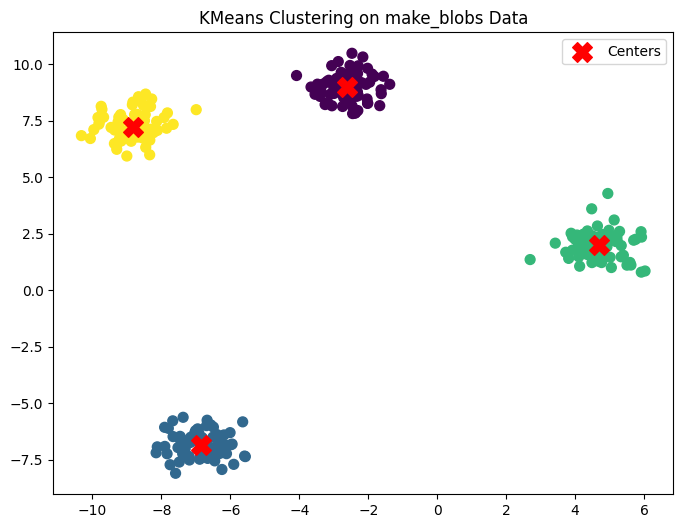

In [2]:
# Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centers')

plt.title("KMeans Clustering on make_blobs Data")
plt.legend()
plt.show()


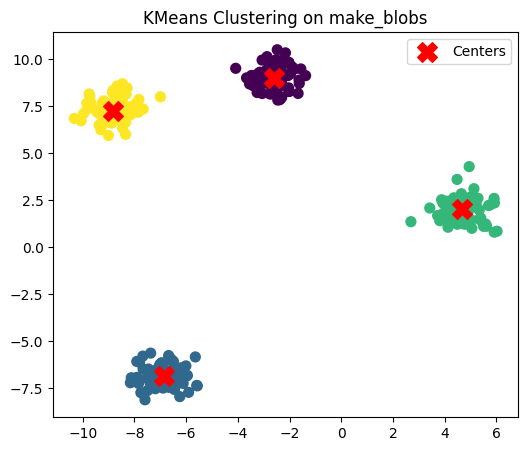

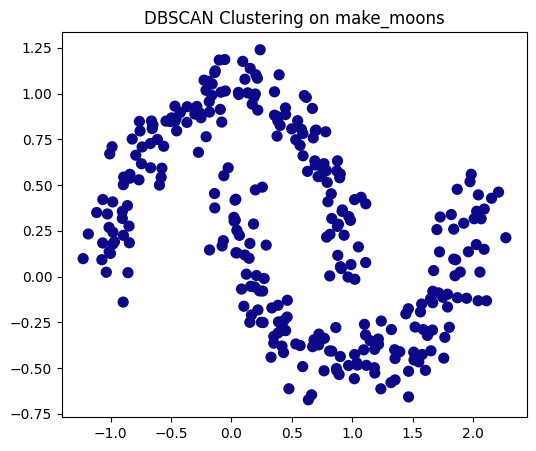

Number of clusters found in Wine dataset (excluding noise): 1


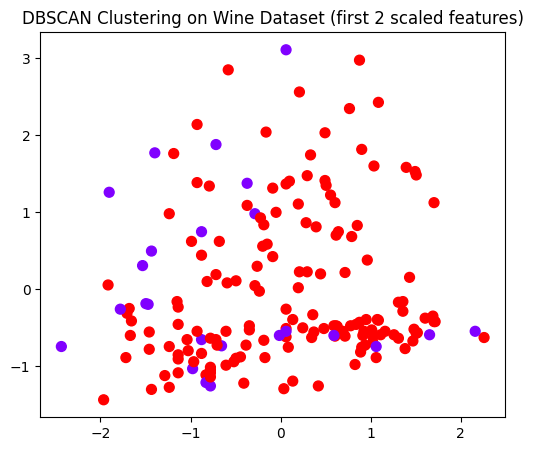

In [4]:
# Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_wine
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

X_blobs, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_blobs)

plt.figure(figsize=(6,5))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label="Centers")
plt.title("KMeans Clustering on make_blobs")
plt.legend()
plt.show()


X_moons, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

dbscan_moons = DBSCAN(eps=0.3, min_samples=5)
y_dbscan_moons = dbscan_moons.fit_predict(X_moons)

plt.figure(figsize=(6,5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_dbscan_moons, s=50, cmap='plasma')
plt.title("DBSCAN Clustering on make_moons")
plt.show()


wine = load_wine()
X_wine = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)


dbscan_wine = DBSCAN(eps=2.5, min_samples=5)
y_dbscan_wine = dbscan_wine.fit_predict(X_scaled)

n_clusters = len(set(y_dbscan_wine)) - (1 if -1 in y_dbscan_wine else 0)
print("Number of clusters found in Wine dataset (excluding noise):", n_clusters)

plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_dbscan_wine, s=50, cmap='rainbow')
plt.title("DBSCAN Clustering on Wine Dataset (first 2 scaled features)")
plt.show()


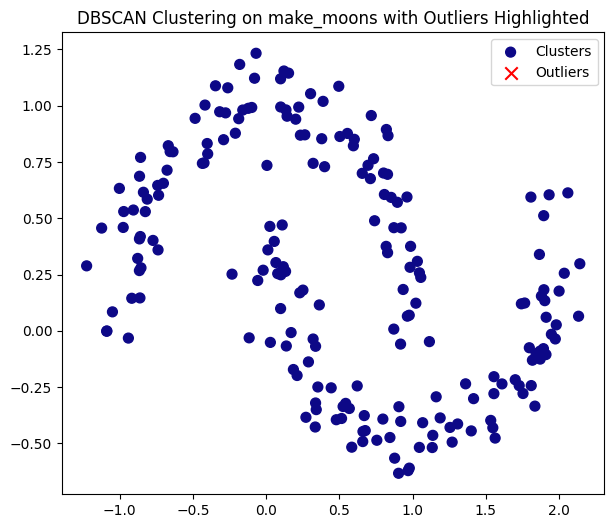

In [5]:
# Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

outliers = (y_dbscan == -1)

plt.figure(figsize=(7,6))
plt.scatter(X[~outliers, 0], X[~outliers, 1], c=y_dbscan[~outliers], cmap="plasma", s=50, label="Clusters")
plt.scatter(X[outliers, 0], X[outliers, 1], c="red", marker="x", s=80, label="Outliers")
plt.title("DBSCAN Clustering on make_moons with Outliers Highlighted")
plt.legend()
plt.show()


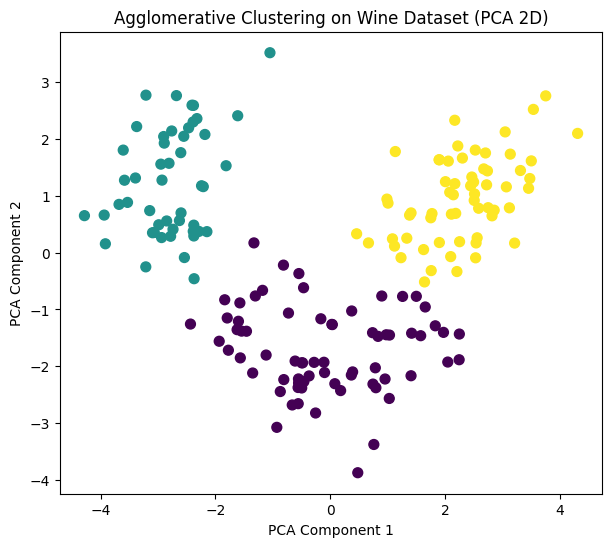

In [6]:
#  Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


agg_clustering = AgglomerativeClustering(n_clusters=3)  # wine has 3 classes
y_agg = agg_clustering.fit_predict(X_pca)


plt.figure(figsize=(7,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_agg, cmap="viridis", s=50)
plt.title("Agglomerative Clustering on Wine Dataset (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


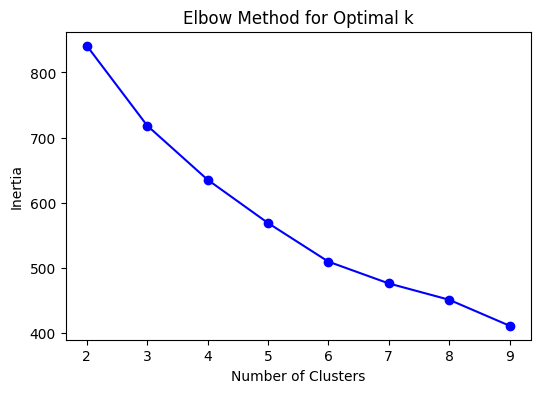

Silhouette Score: 0.17452658548687786


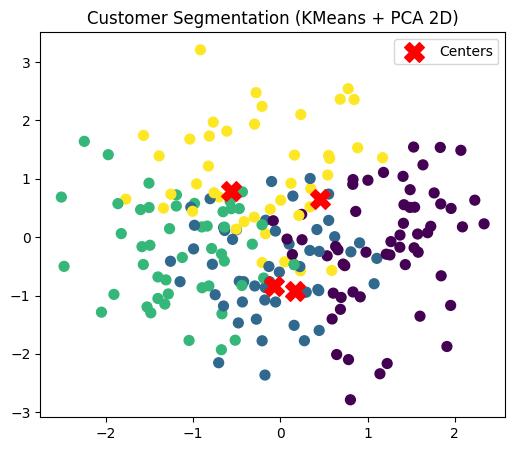

In [7]:
# You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories. Describe your real-world data science workflow using clustering:
# ● Which clustering algorithm(s) would you use and why?
# ● How would you preprocess the data (missing values, scaling)?
# ● How would you determine the number of clusters?
# ● How would the marketing team benefit from your clustering analysis?

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


np.random.seed(42)
data = {
    "Age": np.random.randint(18, 70, 200),
    "Annual_Income": np.random.randint(20000, 100000, 200),
    "Electronics_Spend": np.random.randint(0, 2000, 200),
    "Clothing_Spend": np.random.randint(0, 2000, 200),
    "Groceries_Spend": np.random.randint(0, 2000, 200),
}
df = pd.DataFrame(data)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c="red", marker="X", s=200, label="Centers")
plt.title("Customer Segmentation (KMeans + PCA 2D)")
plt.legend()
plt.show()
